# Lecture 4

Intendiamo effettuare delle simulazioni di dinamica molecolare (MD) applicate ad un sistema composto da Argon, il cui potenziale è descritto dal modello di Lennard-Jones, con $\sigma=0.34nm$, $m=39.948$ amu e $\varepsilon=120k_BK$. Esse si avvalgono dell'algoritmo di Verlet per il moto delle particelle, che richiede la risoluzione delle equazioni del moto per il sistema di particelle.
Le simulazioni sono previste in tre condizioni differenti:

- Fase Solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
- Fase Liquida:  $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
- Fase Gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Ricordiamo che stiamo operando all'interno di un insieme microcanonico, dove sono fissate l'energia totale, il numero di particelle e il volume. Pertanto, le temperature riportate sono valori "target" di riferimento, non un valore fissato a priori.


## Fase Solida

Per studiare il sistema in fase solida partiamo impostando una configurazione iniziale di tipo FCC.
Effettuiamo poi 5 simulazioni da 1500 passi ciascuna, una di seguito all'altra, prendendo una misura ogni 10 step e lasciando che il sistema si equilibri prima di procedere alla simulazione vera e propria. Durante la fase di equilibrazione, è importante impostare la configurazione finale dell'ultima simulazione eseguita come punto di partenza della successiva.

A seguire i grafici che rappresentano la fase di equilibrazione del solido:

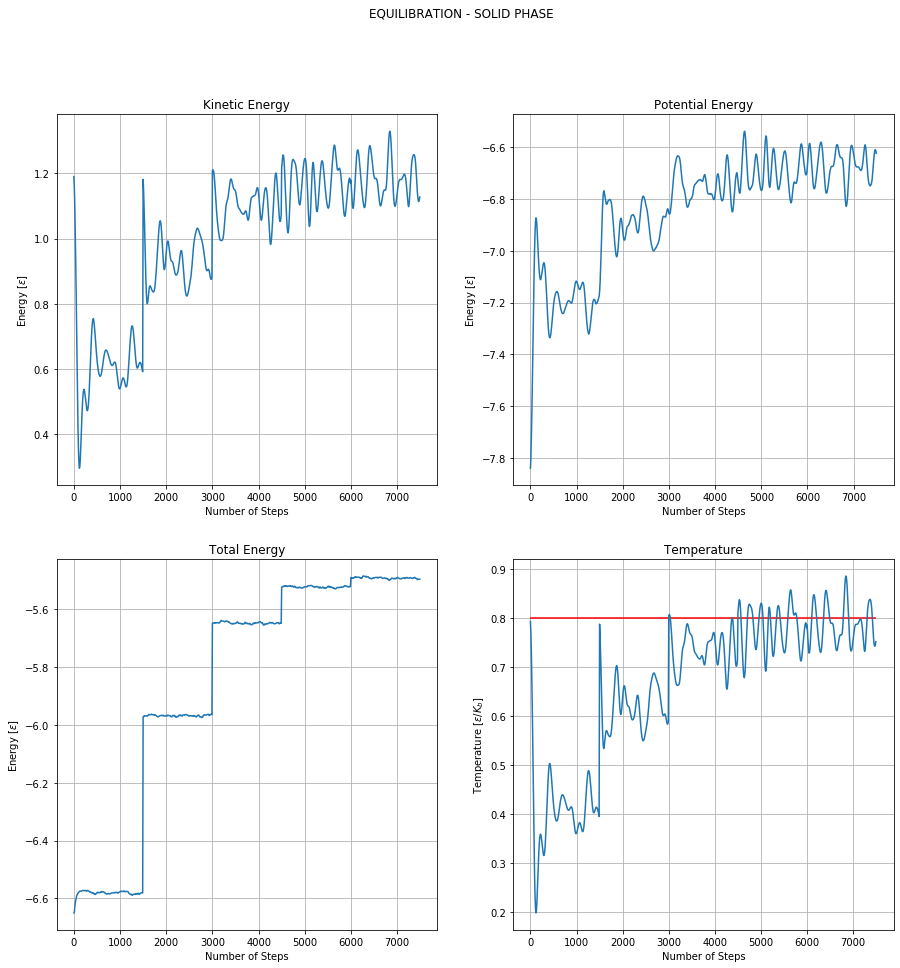

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ekin=np.loadtxt("solid/EQoutput_ekin.dat")
epot=np.loadtxt("solid/EQoutput_epot.dat")
etot=np.loadtxt("solid/EQoutput_etot.dat")
temp=np.loadtxt("solid/EQoutput_temp.dat")
throws = 10*np.arange(len(temp)) #one measurement every 10 throws

fig = plt.figure(figsize=(15,15))
fig.suptitle('EQUILIBRATION - SOLID PHASE')

ax1 = fig.add_subplot(221)
ax1.plot(throws, ekin)
ax1.set_title("Kinetic Energy")
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel(r"Energy [$\varepsilon$]")
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.plot(throws, epot)
ax2.set_title('Potential Energy')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel(r"Energy [$\varepsilon$]")
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.plot(throws, etot)
ax3.set_title('Total Energy')
ax3.set_xlabel('Number of Steps')
ax3.set_ylabel(r"Energy [$\varepsilon$]")
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.hlines(0.8,0,7500, color='red')
ax4.plot(throws, temp)
ax4.set_title('Temperature')
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel(r"Temperature [$\varepsilon/K_b$]")
ax4.grid(True)

plt.show()

Vediamo che già dopo circa $5000$ step il sistema ha raggiunto l'equilibrio. A questo punto, possiamo procedere con la simulazione vera e propria; a tal fine consideriamo $10^5$ step suddivisi in $100$ blocchi e facciamo una misura ogni 10 step:


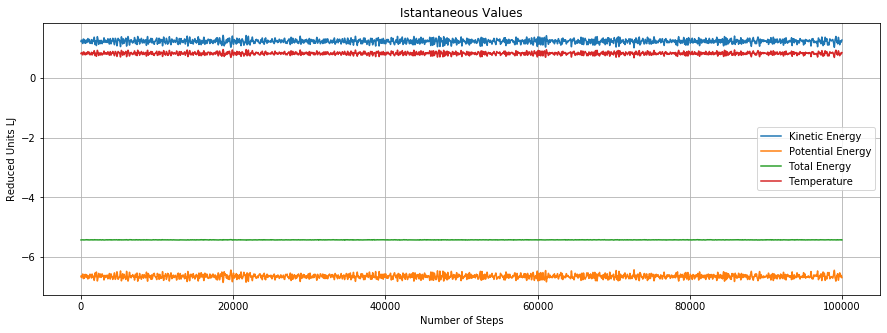

In [4]:
ekin=np.loadtxt("solid/output_ekin.dat")
epot=np.loadtxt("solid/output_epot.dat")
etot=np.loadtxt("solid/output_etot.dat")
temp=np.loadtxt("solid/output_temp.dat")
throws = 10*np.arange(len(temp)) #one measurement every 10 throws

plt.figure(figsize=(15,5))
plt.plot(throws, ekin, label='Kinetic Energy')
plt.plot(throws, epot, label='Potential Energy')
plt.plot(throws, etot, label='Total Energy')
plt.plot(throws, temp, label='Temperature')
plt.title('Istantaneous Values')
plt.xlabel('Number of Steps')
plt.ylabel('Reduced Units LJ')
plt.legend()
plt.grid(True)

plt.show()

Il grafico rappresenta il valore istantaneo delle variabili all'aumentare del numero di step. Notiamo che l'energia totale varia in misura molto minore rispetto alle altre quantità (e così la sua incertezza), come è giusto che sia dato che stiamo esaminando un sistema microcanonico ad energia totale fissata (dunque l'algoritmo di Verlet per il moto delle particelle conserva effettivamente l'energia totale).

A seguire i grafici che mostrano l'andamento del valore medio delle variabili e le loro incertezze, espressi in unità SI (nota: per ottenere i valori di energia e temperatura in unità del SI basta moltiplicare le energie per $ k_B\times120 \; \text{K}$ e le temperature per $120 \; \text{K}$):

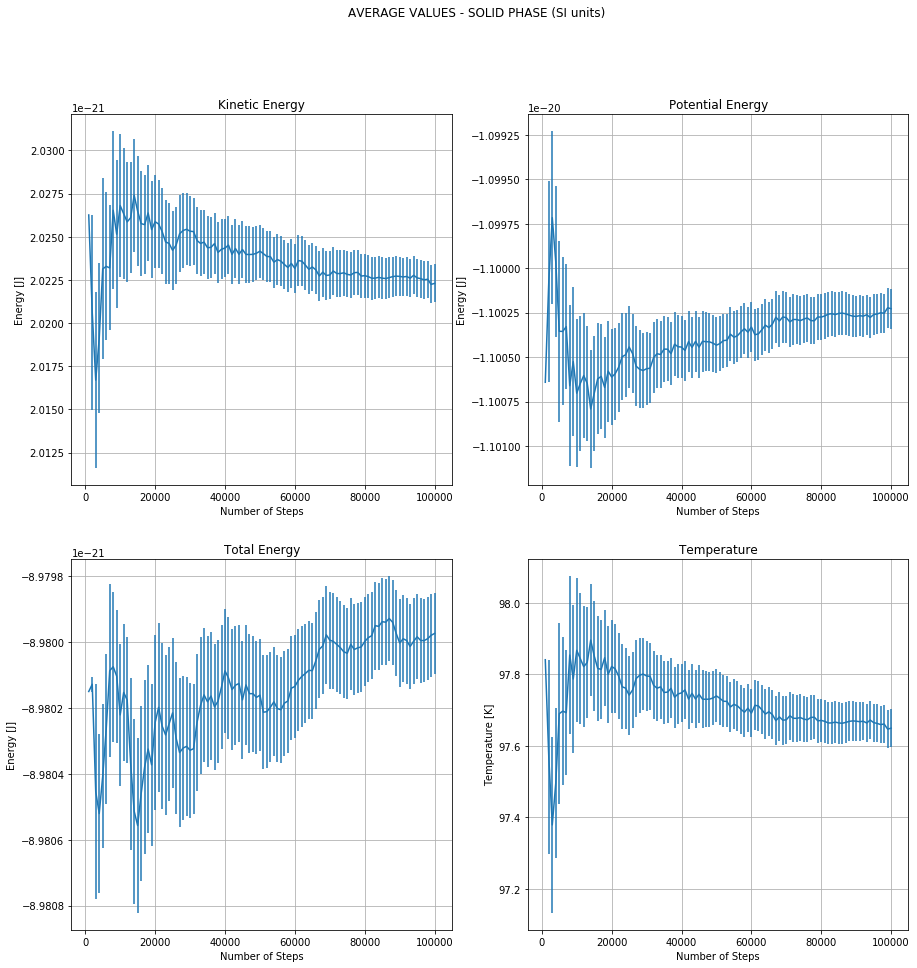

Last block:
Kinetic Energy: ( 2.0223026090693625e-21 ± 1.095566367697784e-24 ) J
Potential Energy: ( -1.1002276439414515e-20 ± 1.121579946019378e-24 ) J
Total Energy: ( -8.979973830345153e-21 ± 1.2388200137125265e-25 ) J
Temperature: ( 97.6498545 ± 0.052901032667999996 ) K


In [6]:
import scipy.constants as sc

Kb = sc.Boltzmann

throwsA, ekin, err_ekin=np.loadtxt("solid/ave_ekin.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsB, epot, err_epot=np.loadtxt("solid/ave_epot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsC, etot, err_etot=np.loadtxt("solid/ave_etot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsD, temp, err_temp=np.loadtxt("solid/ave_temp.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(15,15))
fig.suptitle('AVERAGE VALUES - SOLID PHASE (SI units)')

ax1 = fig.add_subplot(221)
ax1.errorbar(throwsA*1000, ekin*120*Kb, yerr=err_ekin*120*Kb)
ax1.set_title("Kinetic Energy")
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel("Energy [J]")
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.errorbar(throwsB*1000, epot*120*Kb, yerr=err_epot*120*Kb)
ax2.set_title('Potential Energy')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel("Energy [J]")
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.errorbar(throwsC*1000, etot*120*Kb, yerr=err_etot*120*Kb)
ax3.set_title('Total Energy')
ax3.set_xlabel('Number of Steps')
ax3.set_ylabel("Energy [J]")
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.errorbar(throwsD*1000, temp*120, yerr=err_temp*120)
ax4.set_title('Temperature')
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel("Temperature [K]")
ax4.grid(True)

plt.show()

print('Last block:')
print('Kinetic Energy: (', ekin[-1]*120*Kb, '±', err_ekin[-1]*120*Kb, ') J')
print('Potential Energy: (', epot[-1]*120*Kb, '±', err_epot[-1]*120*Kb, ') J')
print('Total Energy: (', etot[-1]*120*Kb, '±', err_etot[-1]*120*Kb, ') J')
print('Temperature: (', temp[-1]*120, '±', err_temp[-1]*120, ') K')


## Fase Liquida

Per la fase liquida impostiamo come partenza l'ultima configurazione ottenuta dallo stato solido.
Effettuiamo poi 5 simulazioni da 1500 passi ciascuna, una di seguito all'altra, prendendo una misura ogni 10 step e lasciando che il sistema si equilibri prima di procedere alla simulazione vera e propria. Durante la fase di equilibrazione, è importante impostare la configurazione finale dell'ultima simulazione eseguita come punto di partenza della successiva.

A seguire i grafici che rappresentano la fase di equilibrazione del liquido:

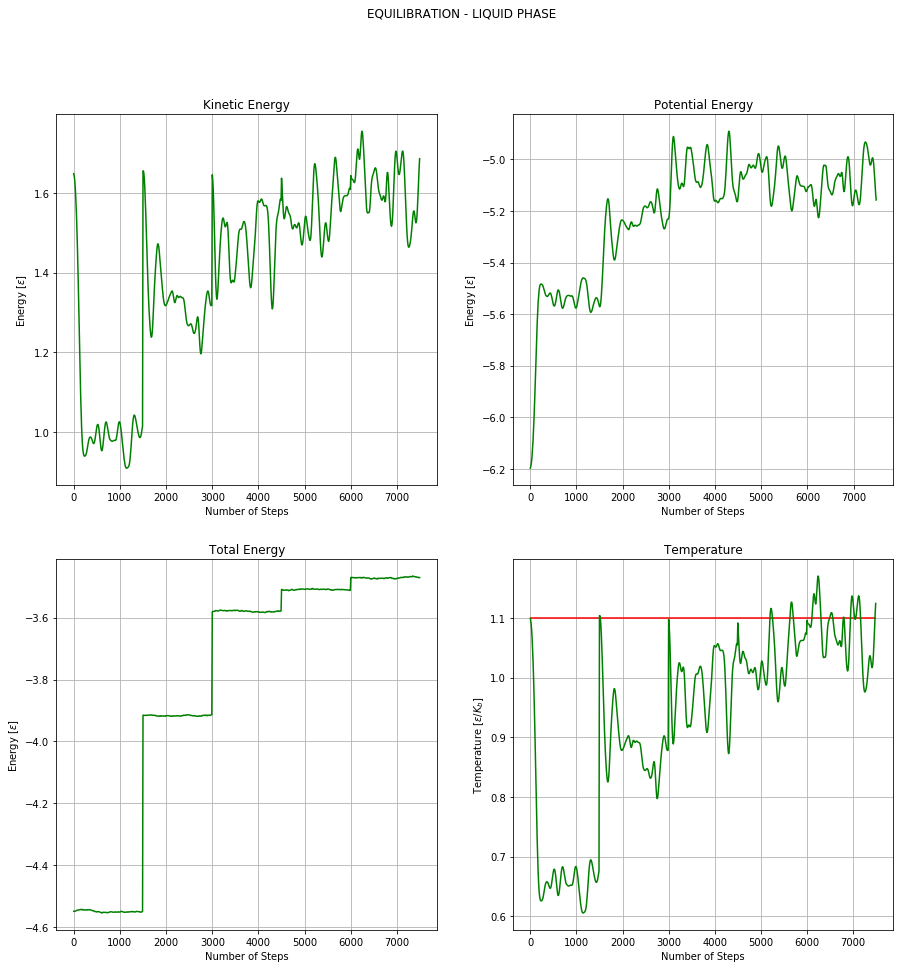

In [9]:
ekin=np.loadtxt("liquid/EQoutput_ekin.dat")
epot=np.loadtxt("liquid/EQoutput_epot.dat")
etot=np.loadtxt("liquid/EQoutput_etot.dat")
temp=np.loadtxt("liquid/EQoutput_temp.dat")
throws = 10*np.arange(len(temp)) #one measurement every 10 throws

fig = plt.figure(figsize=(15,15))
fig.suptitle('EQUILIBRATION - LIQUID PHASE')

ax1 = fig.add_subplot(221)
ax1.plot(throws, ekin, color='green')
ax1.set_title("Kinetic Energy")
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel(r"Energy [$\varepsilon$]")
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.plot(throws, epot, color='green')
ax2.set_title('Potential Energy')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel(r"Energy [$\varepsilon$]")
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.plot(throws, etot, color='green')
ax3.set_title('Total Energy')
ax3.set_xlabel('Number of Steps')
ax3.set_ylabel(r"Energy [$\varepsilon$]")
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.hlines(1.1,0,7500, color='red')
ax4.plot(throws, temp, color='green')
ax4.set_title('Temperature')
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel(r"Temperature [$\varepsilon/K_b$]")
ax4.grid(True)

plt.show()

Vediamo che già dopo circa $6000$ step il sistema ha raggiunto l'equilibrio. A questo punto possiamo procedere con la simulazione vera e propria; a tal fine consideriamo $10^5$ step suddivisi in $100$ blocchi e facciamo una misura ogni 10 step:

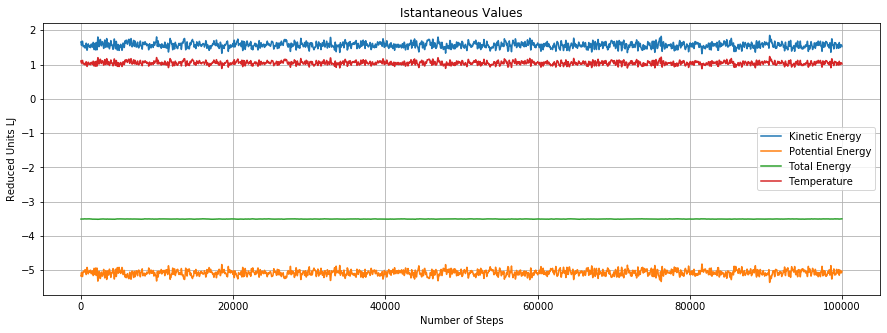

In [10]:
ekin=np.loadtxt("liquid/output_ekin.dat")
epot=np.loadtxt("liquid/output_epot.dat")
etot=np.loadtxt("liquid/output_etot.dat")
temp=np.loadtxt("liquid/output_temp.dat")
throws = 10*np.arange(len(temp)) #one measurement every 10 throws

plt.figure(figsize=(15,5))
plt.plot(throws, ekin, label='Kinetic Energy')
plt.plot(throws, epot, label='Potential Energy')
plt.plot(throws, etot, label='Total Energy')
plt.plot(throws, temp, label='Temperature')
plt.title('Istantaneous Values')
plt.xlabel('Number of Steps')
plt.ylabel('Reduced Units LJ')
plt.legend()
plt.grid(True)

plt.show()

Il grafico rappresenta il valore istantaneo delle variabili all'aumentare del numero di step. Notiamo che l'energia totale varia in misura molto minore rispetto alle altre quantità (e così la sua incertezza), come è giusto che sia dato che stiamo esaminando un sistema microcanonico ad energia totale fissata (dunque l'algoritmo di Verlet per il moto delle particelle conserva effettivamente l'energia totale).

A seguire i grafici che mostrano l'andamento del valore medio delle variabili e le loro incertezze, espressi in unità SI:

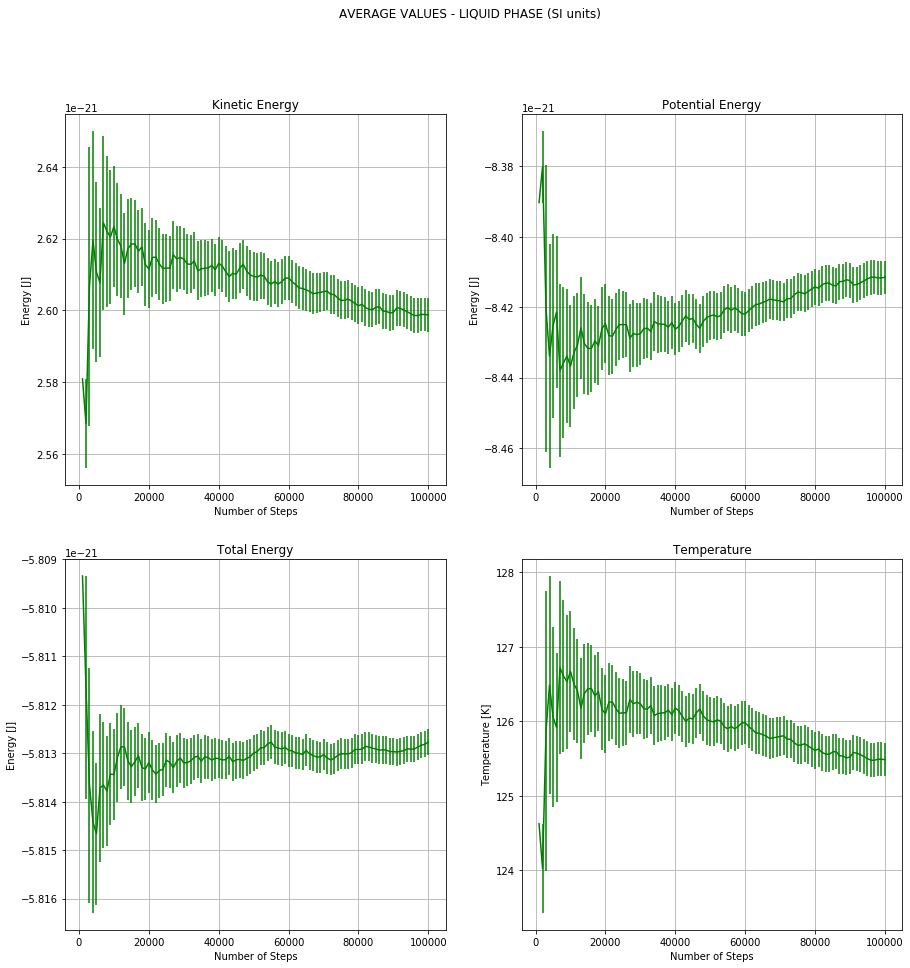

Last block:
Kinetic Energy: ( 2.598758778641459e-21 ± 4.6204927961376706e-24 ) J
Potential Energy: ( -8.41152582204771e-21 ± 4.7177090902590754e-24 ) J
Total Energy: ( -5.8127670434062494e-21 ± 2.665476134307875e-25 ) J
Temperature: ( 125.48488812000001 ± 0.22310728727999998 ) K


In [7]:
throwsA, ekin, err_ekin=np.loadtxt("liquid/ave_ekin.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsB, epot, err_epot=np.loadtxt("liquid/ave_epot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsC, etot, err_etot=np.loadtxt("liquid/ave_etot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsD, temp, err_temp=np.loadtxt("liquid/ave_temp.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(15,15))
fig.suptitle('AVERAGE VALUES - LIQUID PHASE (SI units)')

ax1 = fig.add_subplot(221)
ax1.errorbar(throwsA*1000, ekin*120*Kb, yerr=err_ekin*120*Kb, color='green')
ax1.set_title("Kinetic Energy")
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel("Energy [J]")
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.errorbar(throwsB*1000, epot*120*Kb, yerr=err_epot*120*Kb, color='green')
ax2.set_title('Potential Energy')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel("Energy [J]")
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.errorbar(throwsC*1000, etot*120*Kb, yerr=err_etot*120*Kb, color='green')
ax3.set_title('Total Energy')
ax3.set_xlabel('Number of Steps')
ax3.set_ylabel("Energy [J]")
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.errorbar(throwsD*1000, temp*120, yerr=err_temp*120, color='green')
ax4.set_title('Temperature')
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel("Temperature [K]")
ax4.grid(True)

plt.show()

print('Last block:')
print('Kinetic Energy: (', ekin[-1]*120*Kb, '±', err_ekin[-1]*120*Kb, ') J')
print('Potential Energy: (', epot[-1]*120*Kb, '±', err_epot[-1]*120*Kb, ') J')
print('Total Energy: (', etot[-1]*120*Kb, '±', err_etot[-1]*120*Kb, ') J')
print('Temperature: (', temp[-1]*120, '±', err_temp[-1]*120, ') K')


## Fase Gassosa

Per la fase gassosa impostiamo come partenza l'ultima configurazione ottenuta dallo stato liquido.
Effettuiamo poi 17 simulazioni da 1500 passi ciascuna, una di seguito all'altra, prendendo una misura ogni 10 step e lasciando che il sistema si equilibri prima di procedere alla simulazione vera e propria. Durante la fase di equilibrazione, è importante impostare la configurazione finale dell'ultima simulazione eseguita come punto di partenza della successiva.

A seguire i grafici che rappresentano la fase di equilibrazione del gas:

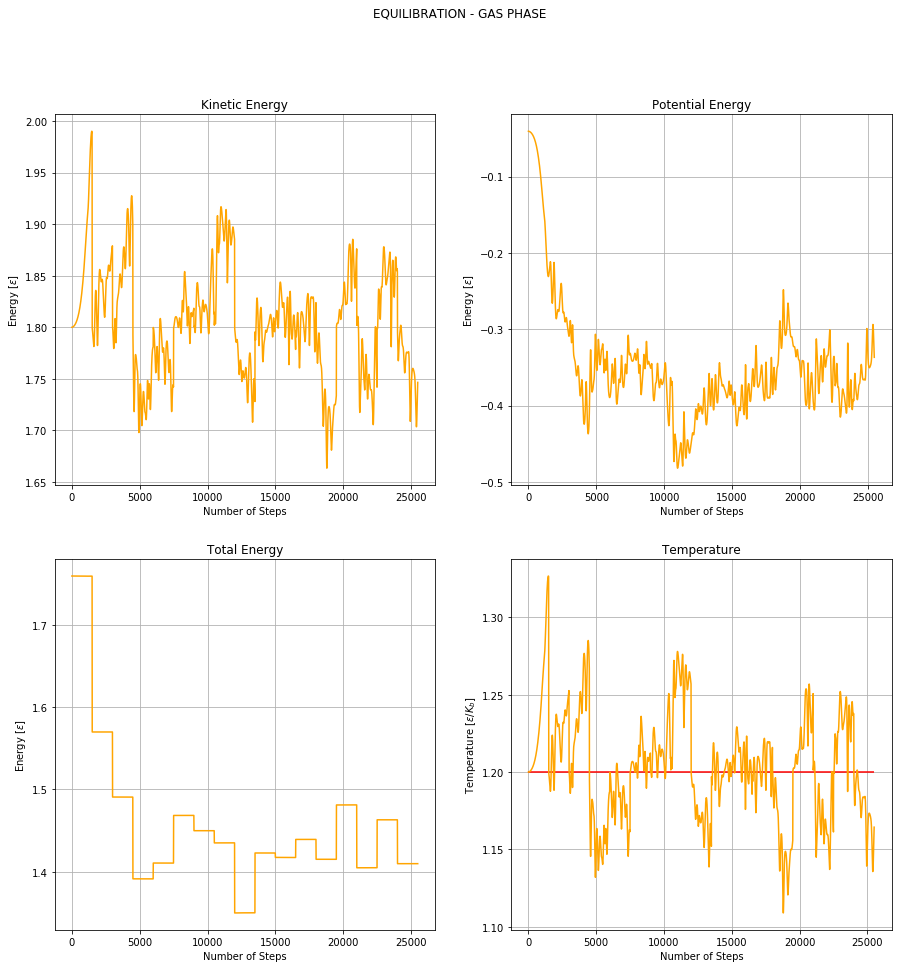

In [13]:
ekin=np.loadtxt("gas/EQoutput_ekin.dat")
epot=np.loadtxt("gas/EQoutput_epot.dat")
etot=np.loadtxt("gas/EQoutput_etot.dat")
temp=np.loadtxt("gas/EQoutput_temp.dat")
throws = 10*np.arange(len(temp)) #one measurement every 10 throws

fig = plt.figure(figsize=(15,15))
fig.suptitle('EQUILIBRATION - GAS PHASE')

ax1 = fig.add_subplot(221)
ax1.plot(throws, ekin, color='orange')
ax1.set_title("Kinetic Energy")
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel(r"Energy [$\varepsilon$]")
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.plot(throws, epot, color='orange')
ax2.set_title('Potential Energy')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel(r"Energy [$\varepsilon$]")
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.plot(throws, etot, color='orange')
ax3.set_title('Total Energy')
ax3.set_xlabel('Number of Steps')
ax3.set_ylabel(r"Energy [$\varepsilon$]")
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.hlines(1.2,0,25500, color='red')
ax4.plot(throws, temp, color='orange')
ax4.set_title('Temperature')
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel(r"Temperature [$\varepsilon/K_b$]")
ax4.grid(True)

plt.show()

A questo punto, il sistema ha raggiunto l'equilibrio e possiamo procedere con la simulazione vera e propria; a tal fine consideriamo $10^5$ step suddivisi in $100$ blocchi e facciamo una misura ogni 10 step:

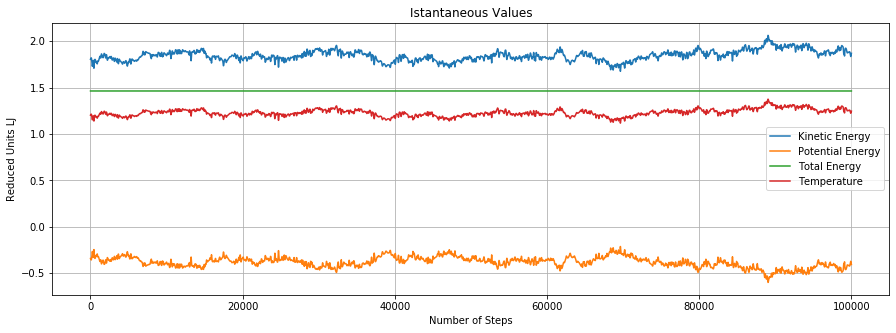

In [14]:
ekin=np.loadtxt("gas/output_ekin.dat")
epot=np.loadtxt("gas/output_epot.dat")
etot=np.loadtxt("gas/output_etot.dat")
temp=np.loadtxt("gas/output_temp.dat")
throws = 10*np.arange(len(temp)) #one measurement every 10 throws

plt.figure(figsize=(15,5))
plt.plot(throws, ekin, label='Kinetic Energy')
plt.plot(throws, epot, label='Potential Energy')
plt.plot(throws, etot, label='Total Energy')
plt.plot(throws, temp, label='Temperature')
plt.title('Istantaneous Values')
plt.xlabel('Number of Steps')
plt.ylabel('Reduced Units LJ')
plt.legend()
plt.grid(True)

plt.show()

Il grafico rappresenta il valore istantaneo delle variabili all'aumentare del numero di step. Notiamo che l'energia totale varia in misura molto minore rispetto alle altre quantità, come è giusto che sia dato che stiamo esaminando un sistema microcanonico ad energia totale fissata.

A seguire i grafici che mostrano l'andamento del valore medio delle variabili e le loro incertezze, espressi in unità SI:

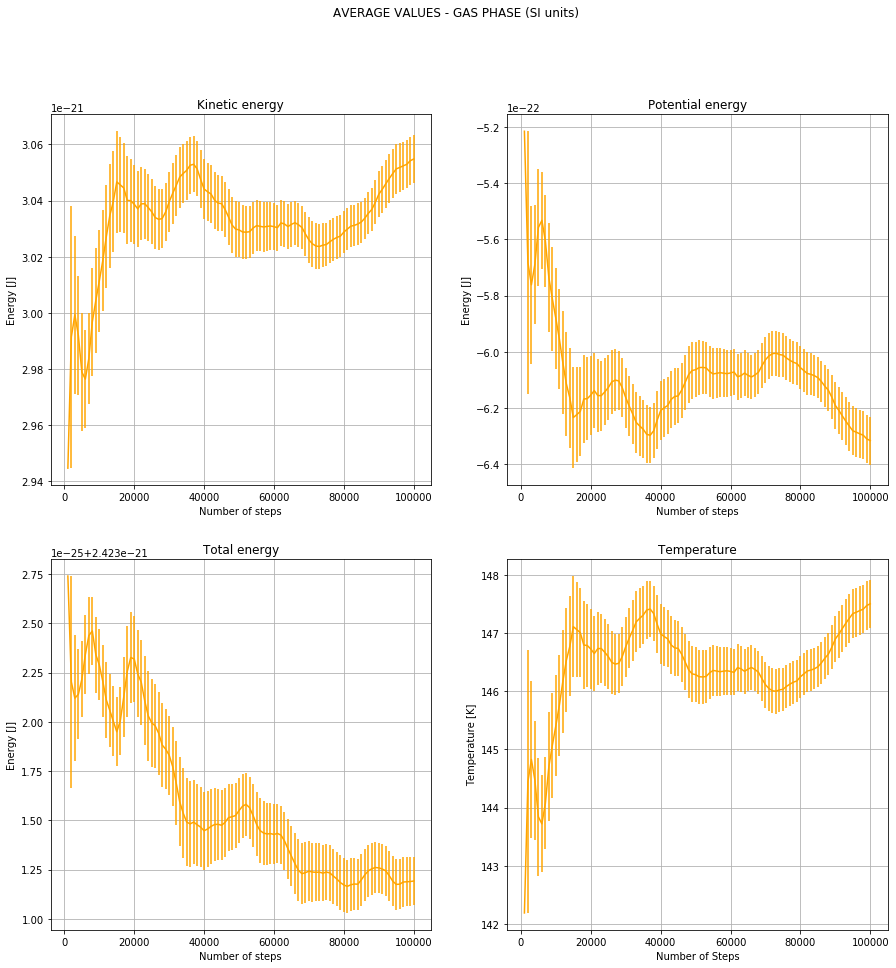

Last block:
Kinetic Energy: ( 3.054805059747402e-21 ± 8.507132896861347e-24 ) J
Potential Energy: ( -6.316858743339917e-22 ± 8.510372119766926e-24 ) J
Total Energy: ( 2.4231191864074777e-21 ± 1.2214087057801356e-26 ) J
Temperature: ( 147.50575320000002 ± 0.41077941828 ) K


In [8]:
throwsA, ekin, err_ekin=np.loadtxt("gas/ave_ekin.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsB, epot, err_epot=np.loadtxt("gas/ave_epot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsC, etot, err_etot=np.loadtxt("gas/ave_etot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
throwsD, temp, err_temp=np.loadtxt("gas/ave_temp.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(15,15))
fig.suptitle('AVERAGE VALUES - GAS PHASE (SI units)')

ax1 = fig.add_subplot(221)
ax1.errorbar(throwsA*1000, ekin*120*Kb, yerr=err_ekin*120*Kb, color='orange')
ax1.set_title("Kinetic energy")
ax1.set_xlabel('Number of steps')
ax1.set_ylabel("Energy [J]")
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.errorbar(throwsB*1000, epot*120*Kb, yerr=err_epot*120*Kb, color='orange')
ax2.set_title('Potential energy')
ax2.set_xlabel('Number of steps')
ax2.set_ylabel("Energy [J]")
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.errorbar(throwsC*1000, etot*120*Kb, yerr=err_etot*120*Kb, color='orange')
ax3.set_title('Total energy')
ax3.set_xlabel('Number of steps')
ax3.set_ylabel("Energy [J]")
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.errorbar(throwsD*1000, temp*120, yerr=err_temp*120, color='orange')
ax4.set_title('Temperature')
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel("Temperature [K]")
ax4.grid(True)

plt.show()

print('Last block:')
print('Kinetic Energy: (', ekin[-1]*120*Kb, '±', err_ekin[-1]*120*Kb, ') J')
print('Potential Energy: (', epot[-1]*120*Kb, '±', err_epot[-1]*120*Kb, ') J')
print('Total Energy: (', etot[-1]*120*Kb, '±', err_etot[-1]*120*Kb, ') J')
print('Temperature: (', temp[-1]*120, '±', err_temp[-1]*120, ') K')
